<a href="https://colab.research.google.com/github/VaidehiMagare/MACHINE-LEARNING-MODEL-IMPLEMENTATION/blob/main/MACHINE_LEARNING_MODEL_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing libraries - using model logistoc regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# From scikit learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
# Loading the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
df = pd.read_csv(url, header= None)

In [11]:
# Assign column names (from the UCI repo)

column_names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"
feature_names = [f"feature_{i}" for i in range(57)] + ["label"]
df.columns = feature_names

In [13]:
# Data Overview

print ("First 5 rows: \n")
print (df.head())
print ("\nClass Distribution: \n")
print (df['label'].value_counts())  # 1 = spam, 0 = not spam

First 5 rows: 

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_6  feature_7  feature_8  feature_9  ...  feature_48  feature_49  \
0       0.00       0.00       0.00       0.00  ...        0.00       0.000   
1       0.21       0.07       0.00       0.94  ...        0.00       0.132   
2       0.19       0.12       0.64       0.25  ...        0.01       0.143   
3       0.31       0.63       0.31       0.63  ...        0.00       0.137   
4       0.31       0.63       0.31       0.63  ...        0.00       0.135   

   feature_50  feature_51  feature_52  feature_53  feature_54  feature_55  \
0         0

In [14]:
# Feature Scaling

X = df.drop("label", axis=1)
y = df["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train /Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Model Training

model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Prediction and Evaluation

y_pred = model.predict(X_test)

print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n",classification_report(y_test, y_pred))


Accuracy Score:  0.9196525515743756

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



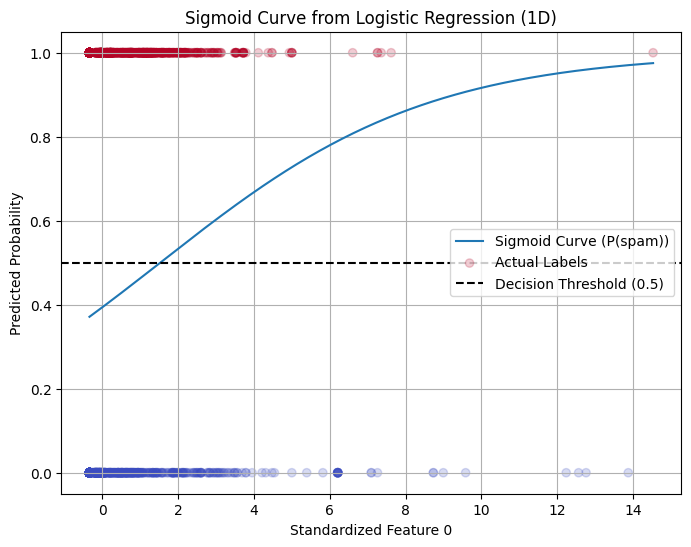

In [19]:
# Selecting a single feature for sigmoid visualization (e.g., feature_0)
feature_index = 0
X_single = X_scaled[:, feature_index].reshape(-1, 1)
y = df['label'].values

# Training a new Logistic Regression model on a single feature
model_1d = LogisticRegression()
model_1d.fit(X_single, y)

# Generating a range of values for the sigmoid curve
x_vals = np.linspace(X_single.min(), X_single.max(), 300).reshape(-1, 1)
y_proba = model_1d.predict_proba(x_vals)[:, 1]  # probability of class 1 (spam)

# Plot the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_proba, label='Sigmoid Curve (P(spam))')
plt.scatter(X_single, y, alpha=0.2, label='Actual Labels', c=y, cmap='coolwarm')
plt.axhline(0.5, color='black', linestyle='--', label='Decision Threshold (0.5)')
plt.xlabel(f"Standardized Feature {feature_index}")
plt.ylabel("Predicted Probability")
plt.title("Sigmoid Curve from Logistic Regression (1D)")
plt.legend()
plt.grid(True)
plt.show()

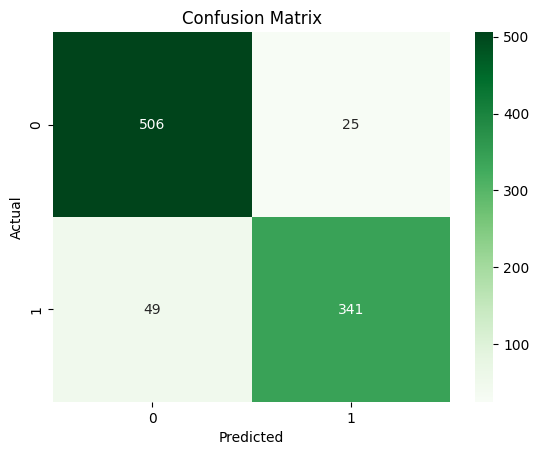

In [18]:
# Confusion Matrix :-

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()